<a href="https://colab.research.google.com/github/carlibeisel/mason_water_budget/blob/main/reach_precip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

By Carli Beisel

Created August, 2024

Purpose: Calculates precipitation for each Reach within Mason Drainage from PRISM.

In [9]:
import os
import geopandas as gpd
! pip install rasterio
import rasterio
import rasterio.features
from rasterio.mask import mask
from rasterio import mask
from rasterio.crs import CRS
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from shapely.geometry import mapping
import numpy as np
import pandas as pd
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Data/Mason/data_input/precipitation/mason_prism_precip.csv')

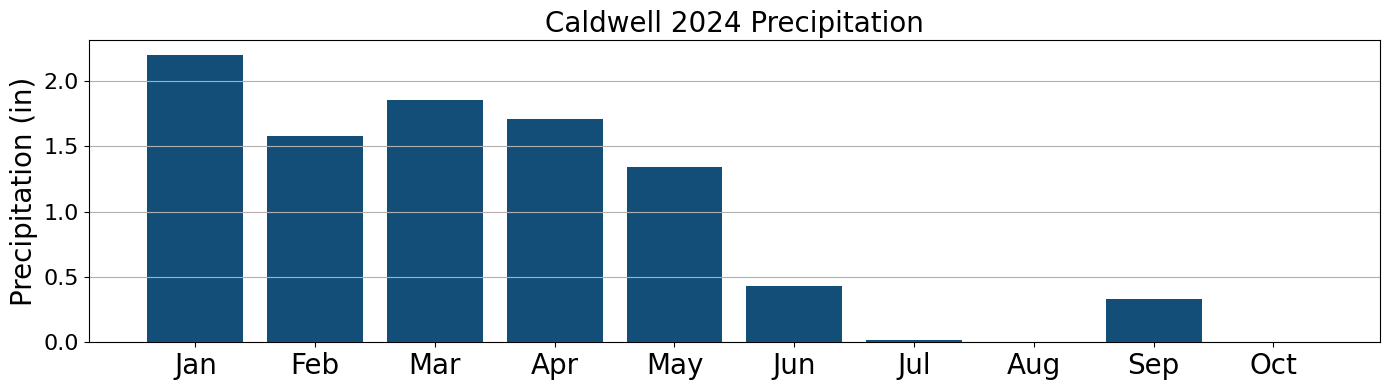

In [23]:
## ---------------- ##
#        Figure
## ---------------- ##

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')

df['year_month'] = df['Date'].dt.to_period('M')

monthly_precip = df.groupby('year_month')['ppt (inches)'].sum().reset_index()

monthly_precip['month_name'] = monthly_precip['year_month'].dt.strftime('%b')

plt.figure(figsize=(14, 4))

plt.bar(monthly_precip['month_name'], monthly_precip['ppt (inches)'], color='#124E78')

plt.xlabel('', fontsize=24)
plt.ylabel('Precipitation (in)', fontsize=20)
plt.title('Caldwell 2024 Precipitation', fontsize=20)

plt.xticks(rotation=0, fontsize=20)
plt.yticks(fontsize=16)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()
plt.savefig('/content/drive/MyDrive/Data/Mason/data_output/precip_out/caldwell_monthly_precip.png',dpi=300)
plt.close()